# Explore ranchi venues

To update the csv to be used in this notebook:
- Run List of villages ranchi.ipynb
- Then Four Square for Ranchi.ipynb

In [2]:
import pandas as pd
import numpy as np

In [2]:
# use above function to get venues nearby toronto
# function takes a lot of time
ranchi_venues = pd.read_csv('ranchi_venues.csv')

In [4]:
# see number of venues per neighbourhood
ranchi_venues.groupby('Village').count()

,Unnamed: 0,Village Latitude,Village Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Village,,,,,,,
Achudih,30,30,30,30,30,30,30
Agartoli,15,15,15,15,15,15,15
Agra,4,4,4,4,4,4,4
Agru,26,26,26,26,26,26,26
Ajaigarh,4,4,4,4,4,4,4
Aktan,7,7,7,7,7,7,7
Akumroma,1,1,1,1,1,1,1
Alna,2,2,2,2,2,2,2
Ambajhariya,8,8,8,8,8,8,8


In [5]:
# one hot encoding
ranchi_onehot = pd.get_dummies(ranchi_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ranchi_onehot['Village'] = ranchi_venues['Village'] 

# move neighborhood column to the first column
fixed_columns = [ranchi_onehot.columns[-1]] + list(ranchi_onehot.columns[:-1])
ranchi_onehot = ranchi_onehot[fixed_columns]

ranchi_onehot.head()

,Village,ATM,American Restaurant,Arcade,Art Gallery,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,...,Theater,Toy / Game Store,Trail,Train Station,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Shop,Women's Store,Zoo
0,Agartoli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Agartoli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Agartoli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Agartoli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Agartoli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# group the data per neighborhood
ranchi_grouped = ranchi_onehot.groupby('Village').count().reset_index()
ranchi_grouped

,Village,ATM,American Restaurant,Arcade,Art Gallery,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,...,Theater,Toy / Game Store,Trail,Train Station,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Shop,Women's Store,Zoo
0,Achudih,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
1,Agartoli,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
2,Agra,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3,Agru,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
4,Ajaigarh,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
5,Aktan,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
6,Akumroma,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,Alna,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
8,Ambajhariya,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
9,Amhesa,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30


In [8]:
# First, let's write a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [9]:
# Now let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Village']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Village'] = ranchi_grouped['Village']

for ind in np.arange(ranchi_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ranchi_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Village,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Achudih,Zoo,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Farm,Diner
1,Agartoli,Zoo,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Farm,Diner
2,Agra,Zoo,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Farm,Diner
3,Agru,Zoo,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Farm,Diner
4,Ajaigarh,Zoo,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Farm,Diner
5,Aktan,Zoo,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Farm,Diner
6,Akumroma,Zoo,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Farm,Diner
7,Alna,Zoo,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Farm,Diner
8,Ambajhariya,Zoo,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Farm,Diner
9,Amhesa,Zoo,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Farm,Diner


# Finding optimal k

In [25]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

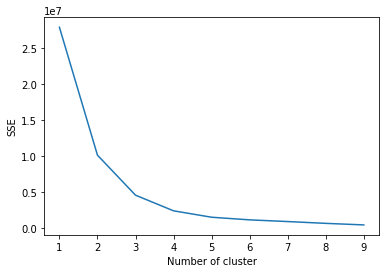

In [28]:
ranchi_grouped_clustering = ranchi_grouped.drop('Village', 1)

sse = {}
for k in range(1, 10):
    # run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0,max_iter = 1000).fit(ranchi_grouped_clustering)
    ranchi_grouped_clustering["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

## Clustering on basis of most common venues

In [48]:
# set number of clusters
kclusters = 5

ranchi_grouped_clustering = ranchi_grouped.drop('Village', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ranchi_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 1, 0, 1, 1, 1, 1, 1, 0])

In [45]:
df = pd.read_csv('ranchi_villages.csv')
df.dropna(inplace=True)

In [49]:
# add clustering labels
neighborhoods_venues_sorted.drop(['Cluster Labels'],axis=1,inplace= True)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ranchi_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
ranchi_merged = ranchi_merged.join(neighborhoods_venues_sorted.set_index('Village'), on='Village')

# drop the column with nan values after join
ranchi_merged.dropna(inplace=True)

ranchi_merged.head() # check the last columns!

,Unnamed: 0,Village,Block,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Agartoli,Angara,Ranchi,23.376190,85.439278,3.0,Zoo,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Farm,Diner
1,1,Angara,Angara,Ranchi,23.376190,85.439278,3.0,Zoo,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Farm,Diner
2,2,Asri,Angara,Ranchi,23.357210,85.666901,1.0,Zoo,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Farm,Diner
3,3,Badri,Angara,Ranchi,23.432671,85.633270,1.0,Zoo,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Farm,Diner
4,4,Baheya,Angara,Ranchi,23.370399,85.487930,3.0,Zoo,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Farm,Diner


In [42]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium

In [64]:
# setup ranchi coordinates
rnc_latitude = 23.3441
rnc_longitude = 85.3096

In [68]:
# create map
map_clusters = folium.Map(location=[rnc_latitude, rnc_longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ranchi_merged['Latitude'], ranchi_merged['Longitude'], ranchi_merged['Village'], ranchi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=1.3,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

In [62]:
# print the first cluster
ranchi_merged.loc[ranchi_merged['Cluster Labels'] == 3, ranchi_merged.columns[[1] + list(range(5, ranchi_merged.shape[1]))]]

,Village,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agartoli,85.439278,3.0,Zoo,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Farm,Diner
1,Angara,85.439278,3.0,Zoo,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Farm,Diner
4,Baheya,85.487930,3.0,Zoo,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Farm,Diner
5,Bakshidih,85.439278,3.0,Zoo,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Farm,Diner
6,Banpur,85.526176,3.0,Zoo,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Farm,Diner
9,Benadag,85.439278,3.0,Zoo,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Farm,Diner
10,Berwari,85.476692,3.0,Zoo,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Farm,Diner
13,Bongaibera,85.516922,3.0,Zoo,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Farm,Diner
15,Burhibera,85.499397,3.0,Zoo,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Farm,Diner
16,Chaldag,85.439278,3.0,Zoo,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Farm,Diner
